In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    


In [2]:
# helper -- days
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
f20mm = select_days('2020-01-01', '2020-06-30', 'mon', 4)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
s20mm = select_days('2020-07-01', '2020-12-31', 'mon', 4)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
f21mm = select_days('2021-01-01', '2021-06-30', 'mon', 4)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
s21mm = select_days('2021-07-01', '2021-12-31', 'mon', 4)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
f22mm = select_days('2022-01-01', '2022-06-30', 'mon', 4)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22ww = select_days('2022-07-01', '2022-12-31', 'wed', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
s22mm = select_days('2022-07-01', '2022-12-31', 'mon', 4)
f23wm = select_days('2023-01-01', '2023-04-17', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-04-17', 'mon', 2)
f23mm = select_days('2023-01-01', '2023-04-17', 'mon', 4)
f23ww = select_days('2023-01-01', '2023-04-19', 'wed', 1)
f23mm.append('2023-04-10')
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a20mm = select_days('2020-01-01', '2020-12-31', 'mon', 4)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a21mm = select_days('2021-01-01', '2021-12-31', 'mon', 4)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)
a22mm = select_days('2022-01-01', '2022-12-31', 'mon', 4)

a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22wt = select_days('2022-01-01', '2022-12-31', 'tue', 1)
a22ww = select_days('2022-01-01', '2022-12-31', 'wed', 1)
a22wh = select_days('2022-01-01', '2022-12-31', 'thu', 1)
a22wf = select_days('2022-01-01', '2022-12-31', 'fri', 1)



hywm = [f20wm, s20wm, f21wm, s21wm, f22wm, s22ww, f23ww]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
hymm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
test = ['2023-04-12','2023-04-19']


In [3]:
# helper -- others

def sharpe(profit):
    avg_rate = np.mean(profit)
    std_rate = np.std(profit)
    Sharpe_Ratio = (avg_rate * 52 -0.028397) / (std_rate * sqrt(52))
    return(Sharpe_Ratio)


def down(profit):
    return_list = [i+1 for i in profit]
    i = np.argmax((np.maximum.accumulate(return_list) - return_list))
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    drawdown_rate = (return_list[j] - return_list[i]) / return_list[j]
    return drawdown_rate


def vola(profit):
    log_return_list = [log(i+1) for i in profit]
    Volatility = std(log_return_list) / sqrt(5)
    annualVolatility = Volatility * sqrt(252) 
    return annualVolatility


def select_group(nm, dt, codes, grp):
    select = []
    if nm == 'id':
        for code in codes:
            if DTBS['B'][code]['yqq'] == grp:
                select.append(code)
    elif nm == 'pr':
        for code in codes:
            if DTBS['A'][code][dt]['dp'] >= grp[0] and DTBS['A'][code][dt]['dp'] <= grp[1]:
                select.append(code)
                
    else:
        for code in codes:
            if DTBS['B'][code]['cat1']  == grp[0]:
                if DTBS['A'][code][dt]['dp'] >= grp[1][0] and DTBS['A'][code][dt]['dp'] <= grp[1][1]:
                    select.append(code)
    return select


def transform_group(grps):
    if len(grps) == 1:
        return grps[0]
    else:
        grp = ['idpr', []]
        for cd1 in grps[0][1]:
            for cd2 in grps[1][1]:
                grp[1].append((cd1, cd2))
        
        return grp
    
def ipo(codes, dt):
    exist = []
    for code in codes:
        if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= (datetime.datetime.strptime(dt, '%Y-%m-%d') + datetime.timedelta(days=-180)):
            exist.append(code)
             
    return exist
    
def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['B'][code]['sn'][:2] != 'st' and DTBS['B'][code]['sn'][:2] != 'ST' and DTBS['B'][code]['sn'][:3] != '*st' and DTBS['B'][code]['sn'][:3] != '*ST':
                if DTBS['A'][code][dt]['yl'] >= 0.5:
                    exist.append(code)
            
    return exist

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]
            
def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
    elif len(fcd) == 1:
        return ipo(codes, dt)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def takeSecond(elem):
    return elem[1]

def takeThird(elem):
    return elem[2]
def takeSeventh(elem):
    return elem[6]

def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low)
    
    
    return [i[0] for i in low]
        
    
idts = [['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]

In [4]:
# plot

def plot_profit(days, profit, mk_one, market = DTBS['C'], tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], profit, linestyle='dashdot',label='策略收益率')
    
    i_x = [days[1], days[-1]]

#     market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
#     i_y = [0, market_gain]
#     plt.plot(i_x, i_y, linestyle='solid',label='中正转债指数')
    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#     plt.ylabel('收益率/%')
    plt.ylabel("increase per year/%")
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

# statistics

def win_stat(res, mk):
    print("Max profit", max(res), ", Max loss", min(res))
    wins = []
    win = 0
    count = 0
    winm = 0
    winsm  = []
    summ = 0
    mksum = 0    
    for i in range(len(res)):
        if res[i] >= mk[i]:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
        summ += res[i]
        mksum += mk[i]
        if (count + 1) % 4 == 0:
            if summ >= mksum:
                winm += 1
                winsm.append(True)
            else:
                winsm.append(False)
                
            summ = 0
            mksum = 0
            
        count += 1
    win_rate = win/len(res)
    winm_rate = winm/len(winsm)
    print("Weekly win rate & details", win_rate, ", ", wins)
    print("Monthly win rate & details", winm_rate,", ", winsm)

def avoid(dt):
    return False
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             if DTBS['A'][code][dt]['dp'] >= 120 and DTBS['A'][code][dt]['dp'] <= 130:
            if DTBS['A'][code][dt]['pd'] >= -20 and  DTBS['A'][code][dt]['pd'] <= 20:
                if not np.isnan(DTBS['A'][code][dt]['ytm']):
                    c.append(DTBS['A'][code][dt]['ytm'] )
#                 c.append(DTBS['A'][code][dt]['cpr'] + DTBS['A'][code][dt]['dp'])
                
    m = np.mean(c)
    
#     return m < -4

    return m


# def heat(dt, idt):
#     return False
    
#     for cd in DTBS['A'].keys:
#         p = []
#         if DTBS['B'][]

# 需要一个一段时间前，比如一个月前，一周前，自动计算

In [5]:
# calculate
def cumulative_profit(days, grp_cd, flt_cd, rk_cd):
    cm_profit = []
    one_profit = []
    all_select = []
    sum_profit = 0
    id_count = 0
    lock = False
    second_check = False
    for i in range(len(days)): 
        if i+1 == len(days):
            exist = select_existing(days[i])
            
            
        else: 
            exist_tr = select_existing(days[i])
            exist_nr = select_existing(days[i+1])
            exist =list(set(exist_tr).intersection(set(exist_nr)))

        select = exist.copy()
        candidate = []
        if grp_cd != []:
            grp = transform_group(grp_cd)
            # 一段回测内换行业，注意数据要对上     
            if len(grp[1]) != 1:
                grp_c = grp[1][id_count].copy()
                id_count += 1
            else:
                grp_c = grp[1].copy()
            for g in grp_c:
                select = exist.copy()
                select = select_group(grp[0], days[i], select, g)
                for fcd in flt_cd:
                    select = select_condition(select, days[i], fcd)
                for rk in rk_cd:
                    select = rank(select, days[i], rk[0], rk[1], rk[2])                  
                for cd in select:
                    candidate.append(cd)
                    
            # 一段回测内换行业 
#             print(days[i],grp_c)

                            

        
        else: 
            for fcd in flt_cd:
                select = select_condition(select, days[i], fcd)
            for rk in rk_cd:
                select = rank(select, days[i], rk[0], rk[1], rk[2])    
#             if dl > 0:
#                 select = retrieve_low_nodes(select, days[i], dl)
                
            candidate = select.copy()    
        
        
        if avoid(days[i]) != False and avoid(days[i]) <-3.68:
            lock = True
        

            
        if lock == True and avoid(days[i]) >- 2.9:
            lock = False
            
        if lock == True:
            candidate = []
            
        second_check = False
        if second_check:
            candidate_sc = rank(exist, days[i], 'dl', len(exist)//5, 'a')
        
            candidate_new = [i for i in candidate if i in candidate_sc]
            candidate = candidate_new.copy()
        if len(candidate) != 5: print(days[i], len(candidate))
        all_select.append(candidate)
#         print(days[i])
#         for cccc in candidate:
#             print(cccc, DTBS['B'][cccc]['cn'])
        
#         dl = []
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dl'])
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['dp'])
            
#         for cd in candidate:
#             dl.append(DTBS['A'][cd][days[i]]['bl'])
#         print(days[i], candidate, dl)
        dl = []
        if i >= 1:
        
            tr = 0
            lr = 0
#
            for cd in all_select[i-1]:
                tr += DTBS['A'][cd][days[i]]['dp']
                lr += DTBS['A'][cd][days[i-1]]['dp']
            if len(all_select[i-1]) == 0:
                profit = 0
                print("short position in", days[i-1])
            else:
                profit = ((tr - lr)/ lr)
            one_profit.append(profit)

            sum_profit += profit

                
            cm_profit.append(sum_profit)


    return cm_profit, one_profit    

In [12]:





tts = ['2020年上半年收益率',  '2020年下半年收益率', '2021年上半年收益率', '2021年下半年收益率','2022年上半年收益率', '2022年下半年收益率','2023年上半年收益率']





tf = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
tm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
twy = [a20wm, a21wm, a22wm, f23wm]

acp = []
grp_cd = []
fil_cd = []
res2 = []
mk = []

tw = [f21wm, s21wm, f22wm, s22wm, f23wm]
# print("ytm>-1市值<7换手2-10双低100-130前5 2022年起每半年至今, 限制双低必须在当天市场前25%")
for i in range(len(tw)):


    grp_cd = []
    fil_cd = [['dp',100,130]]
    
    fil_cd = [['dp',100,130],['ytm', -1, 999], ['bl', 0, 7], ['trt',2,10]]
    


    rk_cd = [['dl', 5, 'a']]
    rk_cd = [['ytm', 5, 'd']]  
    mk_one = []
    
    time = tw[i].copy()
    for k in range(1,len(time)):
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
#     win_stat(one_profit, mk_one)
#     plot_profit(time, cm_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'累计收益率')
#     plot_profit(time, one_profit,mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'单周收益率')
    
    res2.append(one_profit)
    mk.append(mk_one)
    acp.append(cm_profit[-1])
#     print(len(acp), i, acp)
    print(str(round(acp[i]*100,4)) + '%')
#     print('sharpe', sharpe(one_profit))
#     with open('log.txt','a') as f:
#         print(cm_profit[-1], file=f)

# for i in range(7):
#     print(str(round(acp[i]*100,4)) + '%')

19.2301%
19.4933%
10.8212%
2.5179%
2.7522%


In [12]:




for cd in DTBS['B'].keys():
    
    if DTBS['B'][cd]['sn'][:2] == 'st' or DTBS['B'][cd]['sn'][:2] == 'ST' or DTBS['B'][cd]['sn'][:3] == '*st' or DTBS['B'][cd]['sn'][:3] == '*ST':
        print(cd, DTBS['B'][cd]['cn'],  DTBS['B'][cd]['sn'])
DTBS['B']['128100.SZ']        
        

110068.SH 龙净转债 ST龙净
113578.SH 全筑转债 *ST全筑
113595.SH 花王转债 ST花王
123044.SZ 红相转债 *ST红相
113576.SH 起步转债 ST起步
128100.SZ 搜特转债 *ST搜特
128114.SZ 正邦转债 *ST正邦
123015.SZ 蓝盾转债 *ST蓝盾
113587.SH 泛微转债 ST泛微


{'cn': '搜特转债',
 'ipo': '2020-04-09',
 'sc': '002503.SZ',
 'sn': '*ST搜特',
 'cat1': '纺织服饰(2021)',
 'cat2': '服装家纺(2021)',
 'dld': '2023-05-29',
 'sw': '制造',
 'zs': '消费',
 'yqq': '制造'}

['2023-01-09',
 '2023-01-16',
 '2023-01-30',
 '2023-02-06',
 '2023-02-13',
 '2023-02-20',
 '2023-02-27',
 '2023-03-06',
 '2023-03-13',
 '2023-03-20',
 '2023-03-27',
 '2023-04-03',
 '2023-04-10',
 '2023-04-17',
 '2023-04-24',
 '2023-05-08',
 '2023-05-15',
 '2023-05-22']

2023-01-06 6
2023-01-13 6
2023-01-20 3
2023-02-03 9
2023-02-10 6
2023-02-17 0
2023-02-24 6
short position in 2023-02-17
2023-03-03 6
2023-03-10 0
2023-03-17 3
short position in 2023-03-10
2023-03-24 6
2023-03-31 0
2023-04-07 9
short position in 2023-03-31
2023-04-14 6
2023-04-21 0
2023-04-28 6
short position in 2023-04-21
2023-05-05 3
2023-05-12 0
Max profit 0.02112383215040443 , Max loss -0.019074598677998093
Weekly win rate & details 0.5882352941176471 ,  [True, True, True, False, True, False, True, False, False, True, True, False, False, True, False, True, True]
Monthly win rate & details 0.5 ,  [True, False, False, True]
1.2181%
sharpe 0.14


<Figure size 8000x6000 with 0 Axes>

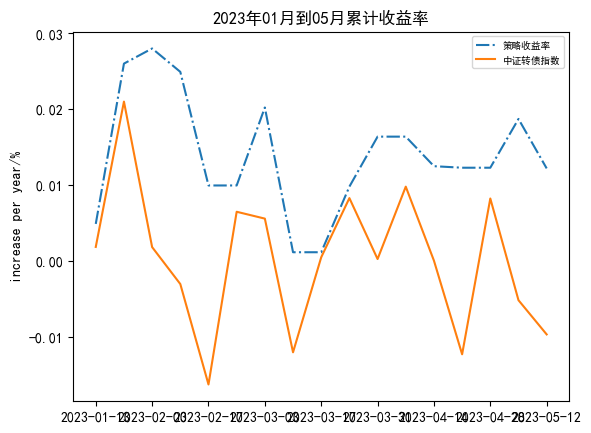

<Figure size 8000x6000 with 0 Axes>

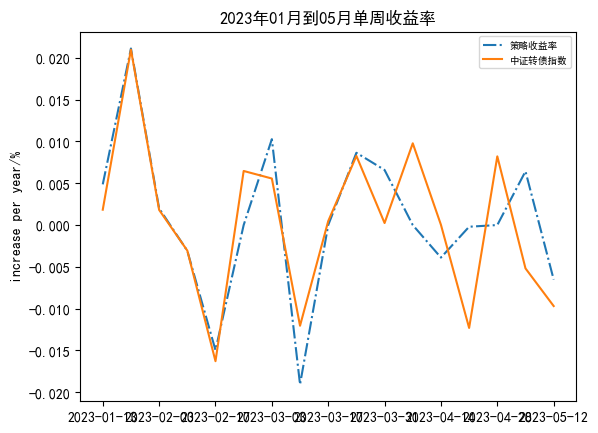

In [16]:
yqqhcday = select_days('2023-01-01', '2023-05-17', 'fri', 1)
# yqqhcday = select_days('2023-01-01', '2023-05-14', 'mon', 1)
idts = [['能源','金融'],['消费','金融'],['环保'],['农业','环保','能源'],['农业','环保'],[],['能源','金融'],['金融','投资'],[],['农业'],['农业','金融'],[],['基建','金融','能源'],['能源','金融'],[],['能源','金融'],['金融'],[]]
tick_spacing = 2
time = yqqhcday.copy()


grp_cd = [['id',idts]]


fil_cd = [['dp',100,130]]
rk_cd = [['dl', 3, 'a']]
# rk_cd = [['ytm', 3, 'd']]
# fil_cd = [['dp',100,130],['ytm', 0.5, 999], ['bl', 0, 7], ['trt',2,10]]
    
mk_one = []
    

for k in range(1,len(time)):
    mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
win_stat(one_profit, mk_one)
plot_profit(time, cm_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'累计收益率')
plot_profit(time, one_profit,mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'单周收益率')
    

print(str(round(cm_profit[-1]*100,4)) + '%')
print('sharpe', round(sharpe(one_profit),2))


In [19]:




prlst = [[110,120], [120,130]]
prlst = [[110,120], [120,130], [130,140]]
# grp_cd = [['id', idlst], ['pr', prlst]]
# grp_cd = [['id', idlst]]
# grp_cd = [['pr', prlst]]
grp_cd = []
fil_cd = []
fil_cd = [['bl',0.3,7]]
fil_cd = []
dl = 0



tts = ['2020年上半年收益率',  '2020年下半年收益率', '2021年上半年收益率', '2021年下半年收益率','2022年上半年收益率', '2022年下半年收益率','2023年上半年收益率']



fil_cd = [['dp', 100, 9999], ['ytm', 1, 1000], ['trt', 2, 10]]







tf = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]
tm = [f20mm, s20mm, f21mm, s21mm, f22mm, s22mm, f23mm]
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
twy = [a20wm, a21wm, a22wm, f23wm]
# tw = [f22wm, s22wm, f23wm]
acp = []
grp_cd = []
fil_cd = []
# res1 = []
res2 = []
mk = []
# print("ytm>-1市值<7换手2-10双低100-130前5 2022年起每半年至今, 限制双低必须在当天市场前25%")
# print("ytm>-1市值<7换手2-10双低100-130前5 2022年起每半年至今, 不限制双低排名")
for i in range(len(tw)):
#     grp_cd = [['id', idts[i]], ['pr', prlst]]
    


    prlst = [[110,120], [120,130], [130,140]]
    prlst = [[110,120], [120,130]]
    prlst = [[110,130]]   

    grp_cd = [['pr', prlst]]
    grp_cd = []
#     fil_cd = [['dp', 100, 9999],['ytm', 0.5, 9999], ['bl', 0.3, 7], ['trt', 2, 10]]

    fil_cd = [['lp',0.5], ['dp',110,130],['bl', 0, 3], ['cpr',-999, 50]]

    fil_cd = [['dp',100,130],['bl', 0, 3]]
    fil_cd = [['cx'],['bl', 0, 7], ['dp',100,130]]


    fil_cd = [['dp',100,130]]
    fil_cd = [['dp',100,130],['ytm', -5, 999], ['bl', 0, 7], ['trt',2,7]]
    fil_cd = [['dp',100,130],['ytm', -1, 999], ['bl', 0, 7], ['trt',2,10]]
    fil_cd = [['dp',100,130]]
#     rk_cd = [['dl', 5, 'a']]
#     rk_cd = [['lp', 5, 'a']]

   

    
    rk_cd = [['ytm', 5, 'd']]  
    
    
    rk_cd = [['dl', 5, 'a']]
    mk_one = []
    
    time = tw[i].copy()
    for k in range(1,len(time)):
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
#     win_stat(one_profit, mk_one)
#     plot_profit(time, cm_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'累计收益率')
#     plot_profit(time, one_profit,mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'单周收益率')
    
    res2.append(one_profit)
    mk.append(mk_one)
    acp.append(cm_profit[-1])
#     print(len(acp), i, acp)
    print(str(round(acp[i]*100,4)) + '%')
    print('sharpe', sharpe(one_profit))
#     with open('log.txt','a') as f:
#         print(cm_profit[-1], file=f)

# for i in range(7):
#     print(str(round(acp[i]*100,4)) + '%')

27.8567%
sharpe 2.047214899947997
-5.6996%
sharpe -0.7748639038429393
7.5949%
sharpe 0.7428816596959483
21.868%
sharpe 3.7534640368347763
-3.2459%
sharpe -0.831003243363325
0.3559%
sharpe -0.2374891599836031
-1.4658%
sharpe -1.261024576630716


2022-04-25 4
2022-05-23 4
27.2817%
sharpe 3.656914874176463
2022-08-22 4
10.0692%
sharpe 1.1631898051588152
5.3227%
sharpe 1.6500611546566677


<Figure size 8000x6000 with 0 Axes>

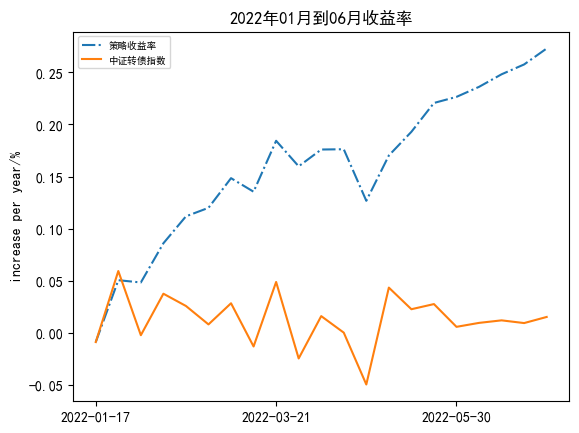

<Figure size 8000x6000 with 0 Axes>

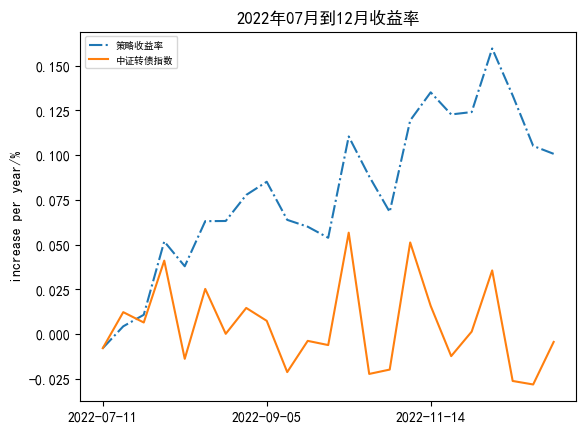

<Figure size 8000x6000 with 0 Axes>

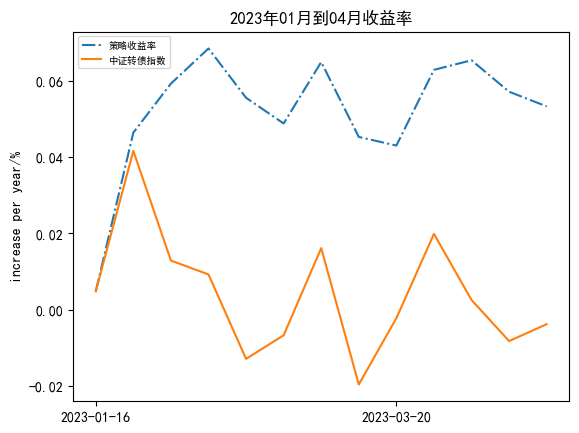

In [16]:
ttt1 = select_days('2020-01-21', '2022-04-25', 'mon', 1)
ttt2 = select_days('2022-04-20', '2023-04-25', 'mon', 1)
ttt = [ttt1, ttt2]

tw = [f22wm, s22wm, f23wm]
tick_spacing = 8

acp = []
grp_cd = []
fil_cd = []
# res1 = []
res2 = []
mk = []
for i in range(3):
#     grp_cd = [['id', idts[i]], ['pr', prlst]]
    


    prlst = [[110,120], [120,130], [130,140]]
    prlst = [[110,120], [120,130]]
    prlst = [[110,130]]   

    grp_cd = [['pr', prlst]]
    grp_cd = []
#     fil_cd = [['dp', 100, 9999],['ytm', 0.5, 9999], ['bl', 0.3, 7], ['trt', 2, 10]]



    fil_cd = [['dp',100,130],['bl', 0, 3]]


    fil_cd = [['lp',0.5], ['dp',110,130],['bl', 0, 3], ['cpr',-999, 50]]

    fil_cd = [['lp',0.5], ['dp',110,130],['bl', 0, 3], ['cpr',-999, 50]]
    fil_cd = [['dp',100,130], ['bl', 0, 7], ['trt',2,7]]
#     rk_cd = [['dl', 5, 'a']]
#     rk_cd = [['lp', 5, 'a']]‘






    rk_cd = [['ytm', 5, 'd']]
    rk_cd = [['lp', 5, 'a']]
    rk_cd = [['dl', 5, 'a']]
    
    mk_one = []
    mk_sum = []
    time = tw[i].copy()
    mk_s = 0
    for k in range(1,len(time)):
       
        mk_one.append((DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]]))
        mk_s += (DTBS['C']['zi'][time[k]]-DTBS['C']['zi'][time[k-1]])/(DTBS['C']['zi'][time[k-1]])

        mk_sum.append(mk_s)
        
    cm_profit, one_profit = cumulative_profit(time, grp_cd, fil_cd, rk_cd)
#     win_stat(one_profit, mk_one)
    plot_profit(time, cm_profit, one_profit, mk_one, tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'收益率')
    
    res2.append(one_profit)
    mk.append(mk_one)
    acp.append(cm_profit[-1])
    print(str(round(acp[i]*100,4)) + '%')
#     print('-----------------------------------------')
#     print(cm_profit[-1])
#     print(win_stat(one_profit, mk_one))
#     print(max(one_profit), time[one_profit.index(max(one_profit))])
#     print(min(one_profit), time[one_profit.index(min(one_profit))])
    print('sharpe', sharpe(one_profit))
#     print(down(one_profit))
#     print(vola(one_profit))
#     with open('log.txt','a') as f:
#         print(cm_profit[-1], file=f)



In [23]:
print(cm_profit[-1])
print(one_profit)
print(mk_sum[-1])
print(mk_one)

0.5506892003953165
[0.2368927260216872, -0.01527174546287337, 0.03259140464272413, 0.0037018608816799096, 0.009109598752303874, -0.0025531900672886225, 0.022462646385785476, -0.0033911492725382793, 0.0297235023041476, 0.0010893246187363309, -0.014213410648745572, 0.026647256791641535, 0.018360253667744804, 0.00016497294443714984, -0.016526841073609938, 0.019763322604310577, 0.016815295758855976, -0.00626322028223369, -0.03203284749145295, 0.018167177117879386, -0.010342010982523402, 0.006585878149803483, -0.0009111731984191107, 0.07432398509905519, 0.06479540675780918, 0.0013651231314032262, 9.167703490282238e-05, 0.004867969461371481, 0.010662565011666226, -0.007038968054543743, 4.353680069020931e-05, 0.03172287822997307, 0.0138409721762746, -0.008696872836874718, 0.002372456955606225, -0.004260332112253457, 0.009125275293585125, 0.023850602409638523, -0.029151356023311908, -0.01812712324791761, 0.015684575098847367, -0.024951726055202097, -0.0020773907801696903, 0.0516763138827141]
0

In [50]:
win_stat(one_profit, mk_one)

Max profit 0.022212717767923114 , Max loss -0.013504140626564467
Weekly win rate & details 0.5384615384615384 ,  [True, True, False, True, False, False, True, True, False, True, False, True, False]
Monthly win rate & details 0.3333333333333333 ,  [False, True, False]


In [22]:
print(max(one_profit), ttt1[one_profit.index(max(one_profit))])
print(min(one_profit), ttt1[one_profit.index(min(one_profit))])

0.2368927260216872 2021-04-26
-0.03203284749145295 2021-09-13


In [24]:
print(sharpe(one_profit))
print(down(one_profit))
print(vola(one_profit))

2.1285657281111003
0.21742028864387147
0.26530404757051834


In [54]:
def plot_profit_compare(days, res1, res2, mk_one, tt = '收益率'):
    plt.figure(figsize=(80,60))
    

        
    fig, ax = plt.subplots(1,1)
#     plt.plot(days[1:], one_profit, linestyle='dashdot',label='价格110-130+50%低价+市值<3+转股溢价率<50:低价前5')
    plt.plot(days[1:], res1, linestyle='dashed',label='高ytm策略单周表现')
    plt.plot(days[1:], res2, linestyle='dotted',label='双低小市值策略单周表现')    



    plt.plot(days[1:], mk_one, linestyle='solid',label='中证转债指数单周表现')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('收益率/%')
#     tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
#     plt.show()
#     print("Final gain", profit[-1], ',',"Market gain", market_gain)

<Figure size 8000x6000 with 0 Axes>

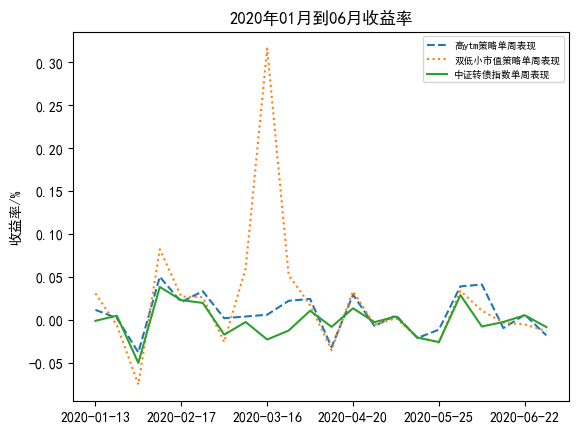

<Figure size 8000x6000 with 0 Axes>

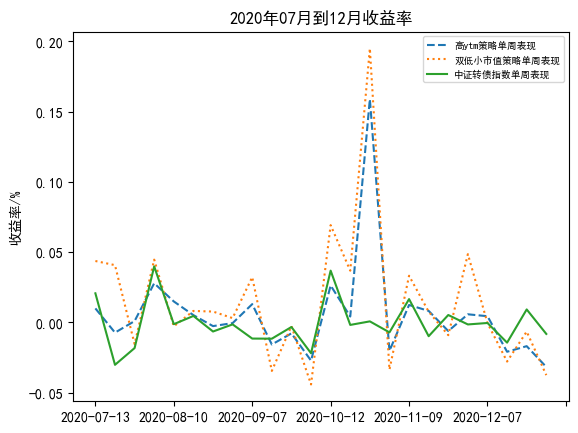

<Figure size 8000x6000 with 0 Axes>

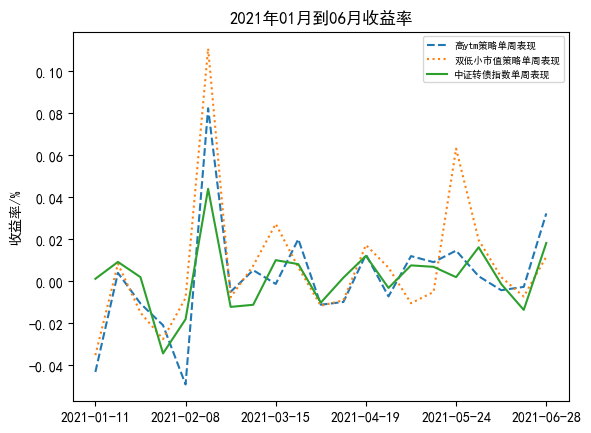

<Figure size 8000x6000 with 0 Axes>

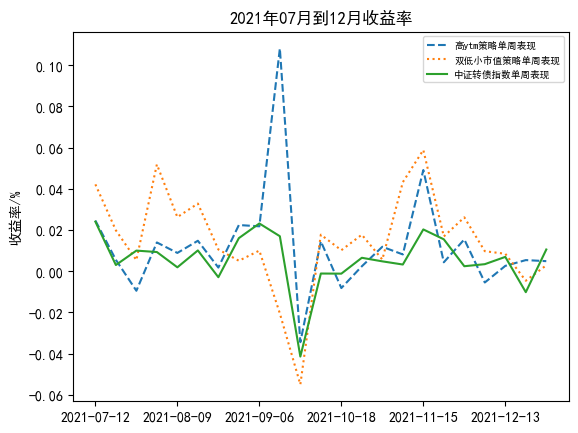

<Figure size 8000x6000 with 0 Axes>

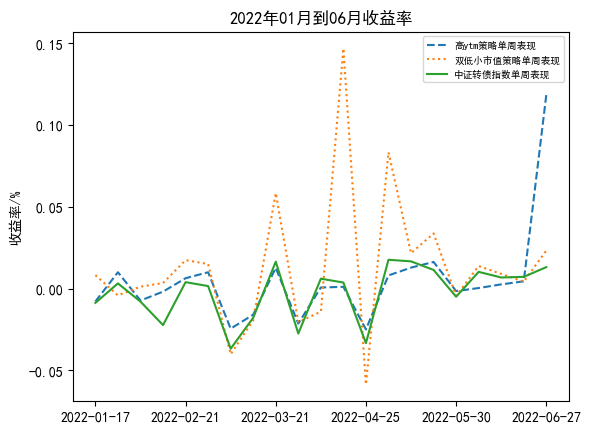

<Figure size 8000x6000 with 0 Axes>

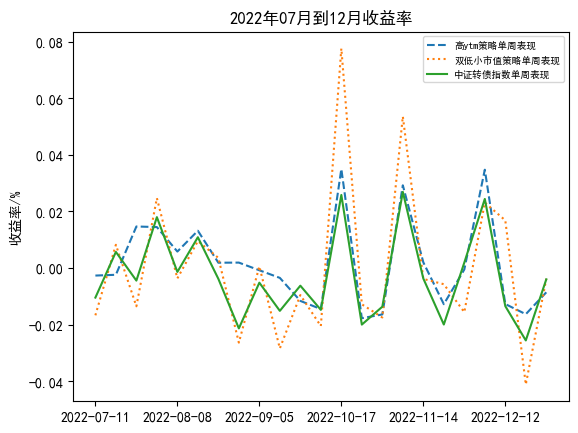

<Figure size 8000x6000 with 0 Axes>

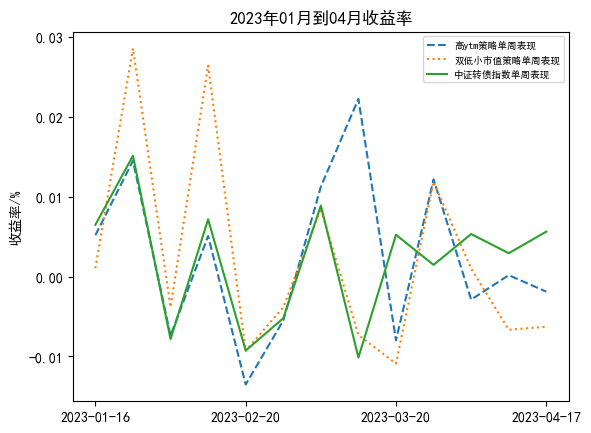

In [36]:
tw = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
for i in range(7):
    time = tw[i].copy()
    plot_profit_compare(time, res1[i], res2[i], mk[i], tt = time[0][:4] + '年' + time[0][5:7] +'月' + '到' + time[-1][5:7] + '月' +'收益率')
    


In [44]:
sel = 0
al = 0
dt = '2023-04-19'
dt = '2017-12-29'
for code in DTBS['A'].keys():
    if DTBS['A'][code][dt]['ia'] == 1:
        if DTBS['B'][code]['cat1'] == '银行(2021)':
            sel += DTBS['A'][code][dt]['bl']
        elif DTBS['B'][code]['cat1'] == '非银金融(2021)':
            sel += DTBS['A'][code][dt]['bl']
        al += DTBS['A'][code][dt]['bl']
print(sel)
print(al)
print(str(round(sel/al * 100,2)) + '%')

369.9987
854.4572879999998
43.3%


In [9]:
import os,random,time
f=open(os.getcwd()+r"/menu.txt","r",encoding="utf-8")
a=f.readlines()
li=[]
for aa in a:
    li.append(aa.strip())
print("程序正在从列表"+str(li)+"中进行随机选择，请稍后")
time.sleep(1)
print("选择结果为："+random.choice(li))
os.system("pause")

程序正在从列表['老乡鸡', '自选']中进行随机选择，请稍后
选择结果为：自选


0

In [2]:
a = [1,2]
b = [1,3]

In [3]:
a * b

TypeError: can't multiply sequence by non-int of type 'list'

In [80]:
codes = list(DTBS['A'].keys())
codes = rank(codes, '2023-04-10', 'ytm', num = -1)
for code in codes:
    print(code, DTBS['B'][code]['cn'],"YTM", DTBS['A'][code][ '2023-04-10']['ytm'])

In 2023-04-10 471 of 757 is selected
128100.SZ 搜特转债 YTM 13.96
128014.SZ 永东转债 YTM 10.11
113578.SH 全筑转债 YTM 8.12
128114.SZ 正邦转债 YTM 6.85
110072.SH 广汇转债 YTM 5.53
128085.SZ 鸿达转债 YTM 5.01
113589.SH 天创转债 YTM 4.81
123049.SZ 维尔转债 YTM 4.5
127047.SZ 帝欧转债 YTM 4.46
113596.SH 城地转债 YTM 4.37
128138.SZ 侨银转债 YTM 4.1
113576.SH 起步转债 YTM 4.01
128062.SZ 亚药转债 YTM 3.91
113056.SH 重银转债 YTM 3.55
113037.SH 紫银转债 YTM 3.46
113042.SH 上银转债 YTM 3.39
128129.SZ 青农转债 YTM 3.35
110059.SH 浦发转债 YTM 3.29
128108.SZ 蓝帆转债 YTM 3.26
123126.SZ 瑞丰转债 YTM 3.14
123128.SZ 首华转债 YTM 2.79
113584.SH 家悦转债 YTM 2.78
113065.SH 齐鲁转债 YTM 2.77
113601.SH 塞力转债 YTM 2.71
128127.SZ 文科转债 YTM 2.66
113624.SH 正川转债 YTM 2.64
123056.SZ 雪榕转债 YTM 2.58
113608.SH 威派转债 YTM 2.56
127034.SZ 绿茵转债 YTM 2.55
113052.SH 兴业转债 YTM 2.55
123076.SZ 强力转债 YTM 2.49
123096.SZ 思创转债 YTM 2.45
113033.SH 利群转债 YTM 2.25
128105.SZ 长集转债 YTM 2.25
127061.SZ 美锦转债 YTM 2.16
113610.SH 灵康转债 YTM 2.13
123106.SZ 正丹转债 YTM 2.11
128125.SZ 华阳转债 YTM 2.09
128116.SZ 瑞达转债 YTM 2.02
118000.SH 嘉元转债 YTM 1.91
113

In [35]:
dt = DTBS['D']['day'][-1]

In [6]:
DTBS['A'].keys()
    

dict_keys(['110088.SH', '113545.SH', '113631.SH', '123128.SZ', '123156.SZ', '127027.SZ', '127061.SZ', '110047.SH', '110063.SH', '110070.SH', '110087.SH', '110089.SH', '110092.SH', '111001.SH', '111002.SH', '111003.SH', '111007.SH', '111012.SH', '113025.SH', '113027.SH', '113046.SH', '113047.SH', '113058.SH', '113059.SH', '113064.SH', '113534.SH', '113535.SH', '113566.SH', '113591.SH', '113600.SH', '113615.SH', '113621.SH', '113623.SH', '113632.SH', '113636.SH', '113638.SH', '113640.SH', '113641.SH', '113649.SH', '113650.SH', '113653.SH', '113657.SH', '113663.SH', '118000.SH', '118005.SH', '118006.SH', '118008.SH', '118010.SH', '118018.SH', '118020.SH', '118022.SH', '118023.SH', '118028.SH', '118029.SH', '123012.SZ', '123013.SZ', '123031.SZ', '123046.SZ', '123052.SZ', '123057.SZ', '123076.SZ', '123078.SZ', '123085.SZ', '123091.SZ', '123106.SZ', '123118.SZ', '123124.SZ', '123126.SZ', '123129.SZ', '123144.SZ', '123152.SZ', '123158.SZ', '123165.SZ', '123166.SZ', '123168.SZ', '123169.SZ', '

In [68]:
cats = [ '交通运输(2021)',
 '传媒(2021)',
 '公用事业(2021)',
 '农林牧渔(2021)',
 '医药生物(2021)',
 '商贸零售(2021)',
 '国防军工(2021)',
 '基础化工(2021)',
 '家用电器(2021)',
 '建筑材料(2021)',
 '建筑装饰(2021)',
 '有色金属(2021)',
 '机械设备(2021)',
 '汽车(2021)',
 '煤炭(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '电子(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '纺织服饰(2021)',
 '美容护理(2021)',
 '计算机(2021)',
 '轻工制造(2021)',
 '通信(2021)',
 '钢铁(2021)',
 '银行(2021)',
 '非银金融(2021)',
 '食品饮料(2021)']

len(cats)

29

In [78]:
# after 2022
# 两个起止日期必须对应调整
# market
market = dict()
start = 1217 # 2022 1月
for cat in cats:
    market[cat] = []
    for dt in DTBS['D']['day'][start:]:
        r = []
        for cd in DTBS['A'].keys():
            if DTBS['B'][cd]['cat1'] == cat and DTBS['A'][cd][dt]['ia'] == 1 and not np.isnan(DTBS['A'][cd][dt]['trt']):
                r.append(DTBS['A'][cd][dt]['trt'])
        if r == []:
            print(cat, dt)
            market[cat].append(0)
        else:       
            market[cat].append(np.mean(r))            
market

# choose

{'交通运输(2021)': [3.1287970542857146,
  1.7541399274285714,
  2.2801763137142856,
  1.2504440602857143,
  1.9243495174285716,
  1.7478723295714287,
  1.1110205957142856,
  1.9077916179999999,
  1.567795965714286,
  1.8086624105714288,
  1.037452072142857,
  1.3057383599999999,
  2.5308755942857144,
  1.7976441427142855,
  1.1561113787142858,
  1.3556816667142857,
  1.2392781955714285,
  1.217753849857143,
  1.347681363,
  1.4796788832857142,
  1.6707659202857141,
  2.460339145,
  2.7592423,
  1.8047497585714285,
  3.0586031455714284,
  3.570691661714285,
  2.8872235662857135,
  1.6105143109999998,
  1.2450568814285714,
  1.1950892737142857,
  1.534107521142857,
  1.5636272367142856,
  0.8865544745714286,
  1.9272183615714287,
  11.093076735714286,
  3.746861557142857,
  34.38873302857143,
  157.1720156142857,
  105.46599298571428,
  63.53453913,
  22.45007505857143,
  25.81205520571428,
  16.247589499999997,
  41.623186465714284,
  15.027353281285716,
  8.765742738285715,
  7.84022343814

In [2]:
# backtest

cats = [ '交通运输(2021)',
 '传媒(2021)',
 '公用事业(2021)',
 '农林牧渔(2021)',
 '医药生物(2021)',
 '商贸零售(2021)',
 '国防军工(2021)',
 '基础化工(2021)',
 '家用电器(2021)',
 '建筑材料(2021)',
 '建筑装饰(2021)',
 '有色金属(2021)',
 '机械设备(2021)',
 '汽车(2021)',
 '煤炭(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '电子(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '纺织服饰(2021)',
 '美容护理(2021)',
 '计算机(2021)',
 '轻工制造(2021)',
 '通信(2021)',
 '钢铁(2021)',
 '银行(2021)',
 '非银金融(2021)',
 '食品饮料(2021)']

start2 = 243 # 2022 3月
increase_cat = []
dt = '2023-05-16'
print('今天（'+ dt +'）')
# cats = ['计算机(2021)']
for cat in cats:
    idx = DTBS['D']['day'].index(dt)
    idx_d5 = idx - 5
    idx_d20 = idx - 20
    idx_d5r = [i for i in range(idx_d5, idx)]
    idx_d20r = [i for i in range(idx_d20, idx)]
    
    dt20 = DTBS['D']['day'][idx_d20]
    cd_cat = [cd for cd in DTBS['A'].keys() if DTBS['B'][cd]['cat1'] == cat and DTBS['A'][cd][dt]['ia'] == 1 and DTBS['A'][cd][dt20]['ia'] == 1 ]
    td = []
    
    for cd in cd_cat:
        td.append(DTBS['A'][cd][dt]['trt'])
            
    
    h5 = []
    h20 = []
    
    for cd in cd_cat:   
        o5 = []
        o20 = []
        for i in idx_d20r:
            pdt = DTBS['D']['day'][i]

            if i in idx_d5r:
                o5.append(DTBS['A'][cd][pdt]['trt'])
                
            o20.append(DTBS['A'][cd][pdt]['trt'])
        
        h5.append(np.mean(o5))
        h20.append(np.mean(o20))
        
        
        
        
        
    h5m = np.mean(h5)
    h20m = np.mean(h20)
    tdm = np.mean(td)

    h5d = []
    h20d = []
    for i in idx_d20r:    
      
        o5 = []
        o20 = []
        for cd in cd_cat: 
            pdt = DTBS['D']['day'][i]

            if i in idx_d5r:
                o5.append(DTBS['A'][cd][pdt]['trt'])
                
                    
            o20.append(DTBS['A'][cd][pdt]['trt'])
        if i in idx_d5r:
            h5d.append(np.mean(o5))
        h20d.append(np.mean(o20))
        
        
        
        
        
    h5m = np.mean(h5)
    h20m = np.mean(h20)
    tdm = np.mean(td)
    print( cat[:-6] + '行业热度', round(tdm,2), '前一周:', round(h5m,2), '前一月:', round(h20m,2))
    
#     x = [i for i in range(1,21)]
#     plt.figure()
#     plt.plot(x,h20d,label = '原始数据')

#     ser = pd.Series(h20d)
#     z = np.polyfit(range(1, ser.size + 1), ser, 10)
#     p = np.poly1d(z)
#     y = [p(i) for i in x]
#     plt.plot(x,y,label = '十项式拟合')


#     dp = p.deriv()
#     y = [dp(i) for i in x]
#     plt.plot(x,y, label = '拟合一阶导')
#     plt.title(cat[:-6])
#     plt.legend()
#     print('前一月（之前二十个交易日））'+ cat[:-6] + '行业热度', h20m)

今天（2023-05-16）
交通运输行业热度 1.3 前一周: 2.16 前一月: 1.73
传媒行业热度 29.21 前一周: 70.08 前一月: 58.09
公用事业行业热度 3.27 前一周: 4.58 前一月: 5.01
农林牧渔行业热度 22.57 前一周: 6.72 前一月: 5.31
医药生物行业热度 35.31 前一周: 18.87 前一月: 21.51
商贸零售行业热度 0.57 前一周: 1.14 前一月: 1.41
国防军工行业热度 28.0 前一周: 30.64 前一月: 41.17
基础化工行业热度 5.93 前一周: 11.15 前一月: 13.91
家用电器行业热度 2.6 前一周: 3.71 前一月: 6.56
建筑材料行业热度 2.8 前一周: 3.91 前一月: 15.4
建筑装饰行业热度 40.53 前一周: 27.9 前一月: 33.89
有色金属行业热度 33.07 前一周: 21.2 前一月: 17.73
机械设备行业热度 15.68 前一周: 13.88 前一月: 20.68
汽车行业热度 6.06 前一周: 13.03 前一月: 11.52
煤炭行业热度 1.21 前一周: 1.55 前一月: 1.7
环保行业热度 45.21 前一周: 20.08 前一月: 11.54
电力设备行业热度 18.08 前一周: 14.22 前一月: 11.45
电子行业热度 33.74 前一周: 10.79 前一月: 18.83
石油石化行业热度 2.14 前一周: 2.76 前一月: 4.32
社会服务行业热度 2.01 前一周: 7.75 前一月: 9.15
纺织服饰行业热度 39.39 前一周: 35.38 前一月: 19.91
美容护理行业热度 2.07 前一周: 1.11 前一月: 3.26
计算机行业热度 13.66 前一周: 31.24 前一月: 46.96
轻工制造行业热度 33.91 前一周: 27.65 前一月: 17.15
通信行业热度 24.51 前一周: 50.9 前一月: 129.62
钢铁行业热度 1.87 前一周: 2.47 前一月: 1.93
银行行业热度 0.81 前一周: 1.68 前一月: 1.33
非银金融行业热度 2.07 前一周: 7.38 前一月: 3.19
食品饮料行业热度 6.1 

In [56]:
cats = [ '交通运输(2021)',
 '传媒(2021)',
 '公用事业(2021)',
 '农林牧渔(2021)',
 '医药生物(2021)',
 '商贸零售(2021)',
 '国防军工(2021)',
 '基础化工(2021)',
 '家用电器(2021)',
 '建筑材料(2021)',
 '建筑装饰(2021)',
 '有色金属(2021)',
 '机械设备(2021)',
 '汽车(2021)',
 '煤炭(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '电子(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '纺织服饰(2021)',
 '美容护理(2021)',
 '计算机(2021)',
 '轻工制造(2021)',
 '通信(2021)',
 '钢铁(2021)',
 '银行(2021)',
 '非银金融(2021)',
 '食品饮料(2021)']

fri20 = DTBS['D']['fri'][145:]
fri20 = DTBS['D']['fri'][250:]


md = ['2022-10-21','2022-11-18','2022-12-16','2023-01-13','2023-02-17','2023-03-17','2023-04-14','2023-05-12']
nf = ['2022-11-25','2022-12-23','2023-01-20','2023-02-24','2023-03-24','2023-04-21','2023-05-18']
days = md.copy()
past = []
for i in range(len(days)):
    print(days[i])
    if i+1 == len(days):
        exist = select_existing(days[i])
            
            
    else: 
        exist_tr = select_existing(days[i])
        exist_nr = select_existing(days[i+1])
        exist =list(set(exist_tr).intersection(set(exist_nr)))

    select = exist.copy()

    if i >= 1:
        res = []
        for cat in cats:
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in exist:
                if DTBS['B'][cd]['cat1'] == cat:
                    twp.append(DTBS['A'][cd][days[i]]['dp'])
                    twh.append(DTBS['A'][cd][days[i]]['trt'])        
                
            for cd in past:
                if DTBS['B'][cd]['cat1'] == cat:
                    lwp.append(DTBS['A'][cd][days[i-1]]['dp'])
                    lwh.append(DTBS['A'][cd][days[i-1]]['trt'])
                
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
        res.sort(key=takeSecond, reverse = True)
        res_10 = res[:10]
        print('本月热门行业监测：')
        for o in res_10:
            print(o[0][:-6] + '行业本月共有' + str(o[3]) + '支,平均热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ',平均收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
        res = []
        for resss in res_10:
            cat = resss[0]
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in exist:
                if DTBS['B'][cd]['cat1'] == cat:
                    twp.append(DTBS['A'][cd][nf[i-1]]['dp'])
                    twh.append(DTBS['A'][cd][nf[i-1]]['trt'])        
                
            for cd in past:
                if DTBS['B'][cd]['cat1'] == cat:
                    lwp.append(DTBS['A'][cd][days[i-1]]['dp'])
                    lwh.append(DTBS['A'][cd][days[i-1]]['trt'])
                
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
        res.sort(key=takeThird, reverse = True)
        res_111 = res[:10]
        print(nf[i-1])
        print('下一周监测：')    
        for o in res_111:
            print(o[0][:-6] + '行业本月共有' + str(o[3]) + '支,平均热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ',平均收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
    res = []
#     if i>=2:

#         for cat in past_cat:
#             twp = []
#             twh = []
#             lwp = []
#             lwh = []
#             for cd in exist:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     twp.append(DTBS['A'][cd][days[i]]['dp'])
#                     twh.append(DTBS['A'][cd][days[i]]['trt'])        
                
#             for cd in past:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     lwp.append(DTBS['A'][cd][days[i-1]]['dp'])
#                     lwh.append(DTBS['A'][cd][days[i-1]]['trt'])
                
#             tp = np.mean(twp)
#             th = np.mean(twh)
#             lp = np.mean(lwp)
#             lh = np.mean(lwh)      
            
#             wkpf = (tp-lp) / lp 
#             wkpfa = tp-lp
#             wkht = (th - lh) / lp
#             wkhta = th-lh
# #             print(cat, wkpf, wkht)
#             res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
#         res.sort(key=takeThird, reverse = True)
#         print('上月热门行业继续监测：')
#         for o in res:
#             print(o[0][:-6] + '行业本月共有' + str(o[3]) + '支,平均热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ',平均收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
    
    
    past_cat = [j[0] for j in res_10]
    past = exist.copy()


2022-10-21
2022-11-18
本月热门行业监测：
医药生物行业本月共有39支,平均热度变化幅度70.38%, 变化量91.54,平均收益率变化幅度3.64%, 变化量4.73
传媒行业本月共有6支,平均热度变化幅度34.76%, 变化量47.03,平均收益率变化幅度0.72%, 变化量0.97
机械设备行业本月共有32支,平均热度变化幅度8.32%, 变化量10.89,平均收益率变化幅度-1.44%, 变化量-1.88
轻工制造行业本月共有22支,平均热度变化幅度7.85%, 变化量9.72,平均收益率变化幅度-2.58%, 变化量-3.19
社会服务行业本月共有3支,平均热度变化幅度7.21%, 变化量11.62,平均收益率变化幅度2.34%, 变化量3.77
食品饮料行业本月共有7支,平均热度变化幅度3.66%, 变化量5.14,平均收益率变化幅度-3.92%, 变化量-5.51
石油石化行业本月共有5支,平均热度变化幅度2.91%, 变化量3.64,平均收益率变化幅度-0.81%, 变化量-1.02
美容护理行业本月共有1支,平均热度变化幅度2.76%, 变化量3.97,平均收益率变化幅度-5.21%, 变化量-7.49
纺织服饰行业本月共有13支,平均热度变化幅度0.73%, 变化量0.85,平均收益率变化幅度-1.19%, 变化量-1.37
建筑材料行业本月共有9支,平均热度变化幅度0.33%, 变化量0.39,平均收益率变化幅度-1.49%, 变化量-1.76
2022-11-25
下一周监测：
医药生物行业本月共有39支,平均热度变化幅度72.76%, 变化量94.64,平均收益率变化幅度1.91%, 变化量2.49
社会服务行业本月共有3支,平均热度变化幅度-38.46%, 变化量-62.02,平均收益率变化幅度1.1%, 变化量1.77
石油石化行业本月共有5支,平均热度变化幅度-0.01%, 变化量-0.02,平均收益率变化幅度0.66%, 变化量0.83
传媒行业本月共有6支,平均热度变化幅度28.76%, 变化量38.92,平均收益率变化幅度0.27%, 变化量0.36
建筑材料行业本月共有9支,平均热度变化幅度0.82%, 变化量0.96,平均收益率变化幅度-0.6%, 变化量-0.71
轻工制造行业本月共有22支,平均热度变

KeyError: '2023-05-18'

In [133]:
cats = [ '交通运输(2021)',
 '传媒(2021)',
 '公用事业(2021)',
 '农林牧渔(2021)',
 '医药生物(2021)',
 '商贸零售(2021)',
 '国防军工(2021)',
 '基础化工(2021)',
 '家用电器(2021)',
 '建筑材料(2021)',
 '建筑装饰(2021)',
 '有色金属(2021)',
 '机械设备(2021)',
 '汽车(2021)',
 '煤炭(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '电子(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '纺织服饰(2021)',
 '美容护理(2021)',
 '计算机(2021)',
 '轻工制造(2021)',
 '通信(2021)',
 '钢铁(2021)',
 '银行(2021)',
 '非银金融(2021)',
 '食品饮料(2021)']







cats = ['投资', '制造', '服务', '消费']
cats = ['环保', '医药', '周期', '能源', '科技', '消费', '新能源', '金融']
ctnm = 'zs'
fri20 = DTBS['D']['fri'][145:]
fri20 = DTBS['D']['fri'][258:]


md = ['2022-10-21','2022-11-18','2022-12-16','2023-01-13','2023-02-17','2023-03-17','2023-04-14','2023-05-12']
nf = ['2022-11-25','2022-12-23','2023-01-20','2023-02-24','2023-03-24','2023-04-21','2023-05-18']
days = fri20.copy()
past = []
for i in range(len(days)):
    




    if i > 3 and i < len(days) -2:
        exist_tr = select_existing(days[i-4])
        exist_nr = select_existing(days[i+2])
        exist =list(set(exist_tr).intersection(set(exist_nr)))
        select = exist.copy()

        res = []
        for cat in cats:
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    twp.append(DTBS['A'][cd][days[i]]['dp'])
                    twh.append(DTBS['A'][cd][days[i]]['trt'])        
                
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    lwp.append(DTBS['A'][cd][days[i-4]]['dp'])
                    lwh.append(DTBS['A'][cd][days[i-4]]['trt'])
                
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
        res.sort(key=takeSecond, reverse = True)
        res_10 = res[:10]
        res_10 = res
        print('最近一月热门行业监测：' + days[i-4] + '至'+days[i])
        for o in res_10:
#             print(o[0][:-6] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
            print(o[0] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
        res = []
        for resss in res_10:
            cat = resss[0]
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    twp.append(DTBS['A'][cd][days[i+1]]['dp'])
                    twh.append(DTBS['A'][cd][days[i+1]]['trt'])        
                
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    lwp.append(DTBS['A'][cd][days[i]]['dp'])
                    lwh.append(DTBS['A'][cd][days[i]]['trt'])
                
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
#         res.sort(key=takeThird, reverse = True)
        res_111 = res
        print('下一周监测：'+ days[i] + '至'+days[i+1]) 
        for o in res_111:
#             print(o[0][:-6] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
            print(o[0] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
        res = []
        for resss in res_10:
            cat = resss[0]
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    twp.append(DTBS['A'][cd][days[i+2]]['dp'])
                    twh.append(DTBS['A'][cd][days[i+2]]['trt'])        
                
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    lwp.append(DTBS['A'][cd][days[i+1]]['dp'])
                    lwh.append(DTBS['A'][cd][days[i+1]]['trt'])
                
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
#         res.sort(key=takeThird, reverse = True)
        res_111 = res
        print('下两周监测：'+ days[i+1] + '至'+days[i+2]) 
        for o in res_111:
#             print(o[0][:-6] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
            print(o[0] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
              
    res = []
#     if i>=2:

#         for cat in past_cat:
#             twp = []
#             twh = []
#             lwp = []
#             lwh = []
#             for cd in exist:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     twp.append(DTBS['A'][cd][days[i]]['dp'])
#                     twh.append(DTBS['A'][cd][days[i]]['trt'])        
                
#             for cd in past:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     lwp.append(DTBS['A'][cd][days[i-1]]['dp'])
#                     lwh.append(DTBS['A'][cd][days[i-1]]['trt'])
                
#             tp = np.mean(twp)
#             th = np.mean(twh)
#             lp = np.mean(lwp)
#             lh = np.mean(lwh)      
            
#             wkpf = (tp-lp) / lp 
#             wkpfa = tp-lp
#             wkht = (th - lh) / lp
#             wkhta = th-lh
# #             print(cat, wkpf, wkht)
#             res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
#         res.sort(key=takeThird, reverse = True)
#         print('上月热门行业继续监测：')
#         for o in res:
#             print(o[0][:-6] + '行业本月共有' + str(o[3]) + '支,平均热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ',平均收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
    
    
    past_cat = [j[0] for j in res_10]
    past = exist.copy()


NameError: name 'res_10' is not defined

In [16]:
cats = [ '交通运输(2021)',
 '传媒(2021)',
 '公用事业(2021)',
 '农林牧渔(2021)',
 '医药生物(2021)',
 '商贸零售(2021)',
 '国防军工(2021)',
 '基础化工(2021)',
 '家用电器(2021)',
 '建筑材料(2021)',
 '建筑装饰(2021)',
 '有色金属(2021)',
 '机械设备(2021)',
 '汽车(2021)',
 '煤炭(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '电子(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '纺织服饰(2021)',
 '美容护理(2021)',
 '计算机(2021)',
 '轻工制造(2021)',
 '通信(2021)',
 '钢铁(2021)',
 '银行(2021)',
 '非银金融(2021)',
 '食品饮料(2021)']

cats = ['消费',
 '环保',
 '农业',
 '新能源',
 '电子',
 '能源',
 '医药',
 '投资',
 '金融',
 '科技',
 '制造',
 '基建']


# cats = ['投资', '制造', '服务', '消费']

# cats = ['环保', '医药', '周期', '能源', '科技', '消费', '新能源', '金融']
ctnm = 'yqq'
fri20 = DTBS['D']['fri'][145:]
fri20 = DTBS['D']['fri'][260:]


md = ['2022-10-21','2022-11-18','2022-12-16','2023-01-13','2023-02-17','2023-03-17','2023-04-14','2023-05-12']
nf = ['2022-11-25','2022-12-23','2023-01-20','2023-02-24','2023-03-24','2023-04-21','2023-05-18']
days = fri20.copy()
past = []
for i in range(len(days)):
    




    if i > 2 and i < len(days) -1:
        exist_tr = select_existing(days[i-2])
        exist_nr = select_existing(days[i+1])
        exist =list(set(exist_tr).intersection(set(exist_nr)))
        select = exist.copy()

        res = []
        for cat in cats:
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in select:
                
                if DTBS['B'][cd][ctnm] == cat:
                    twp.append(DTBS['A'][cd][days[i]]['dp'])
                    
                    wks = []
                    id1 = DTBS['D']['day'].index(days[i-1]) 
                    id2 = DTBS['D']['day'].index(days[i]) 
                    wks = DTBS['D']['day'][id1+1:id2+1].copy()
                    for k in wks:
                        twh.append(DTBS['A'][cd][k]['trt'])     
                    
                
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    lwp.append(DTBS['A'][cd][days[i-1]]['dp'])
                    
                    wks = []
                    id1 = DTBS['D']['day'].index(days[i-2]) 
                    id2 = DTBS['D']['day'].index(days[i-1]) 
                    wks = DTBS['D']['day'][id1+1:id2+1].copy()
                    for k in wks:
                        lwh.append(DTBS['A'][cd][k]['trt'])   
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta, abs(wkht)))
        res.sort(key=takeSeventh, reverse = True)
        res_10 = res[:10]
        res_10 = res
        print('最近一周热门行业监测：' + days[i-1] + '至'+days[i])
        for o in res_10:
#             print(o[0][:-6] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
            print(o[0] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
        res = []
        for resss in res_10:
            cat = resss[0]
            twp = []
            twh = []
            lwp = []
            lwh = []
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:

                    twp.append(DTBS['A'][cd][days[i+1]]['dp'])
                    
                    wks = []
                    id1 = DTBS['D']['day'].index(days[i]) 
                    id2 = DTBS['D']['day'].index(days[i+1]) 
                    wks = DTBS['D']['day'][id1+1:id2+1].copy()
                    for k in wks:
                        twh.append(DTBS['A'][cd][k]['trt'])  
                    
                
            for cd in select:
                if DTBS['B'][cd][ctnm] == cat:
                    lwp.append(DTBS['A'][cd][days[i]]['dp'])
                    wks = []
                    id1 = DTBS['D']['day'].index(days[i-1]) 
                    id2 = DTBS['D']['day'].index(days[i]) 
                    wks = DTBS['D']['day'][id1+1:id2+1].copy()
                    for k in wks:
                        lwh.append(DTBS['A'][cd][k]['trt']) 

                
            tp = np.mean(twp)
            th = np.mean(twh)
            lp = np.mean(lwp)
            lh = np.mean(lwh)      
            
            wkpf = (tp-lp) / lp 
            wkpfa = tp-lp
            wkht = (th - lh) / lp
            wkhta = th-lh
#             print(cat, wkpf, wkht)
            res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta,abs(wkht)))
        res.sort(key=takeThird, reverse = True)
        res_111 = res
        print('下一周监测：'+ days[i] + '至'+days[i+1]) 
        for o in res_111:
#             print(o[0][:-6] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
            print(o[0]+ str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
#         res = []
#         for resss in res_10:
#             cat = resss[0]
#             twp = []
#             twh = []
#             lwp = []
#             lwh = []
#             for cd in select:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     twp.append(DTBS['A'][cd][days[i+2]]['dp'])
#                     twh.append(DTBS['A'][cd][days[i+2]]['trt'])        
                
#             for cd in select:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     lwp.append(DTBS['A'][cd][days[i+1]]['dp'])
#                     lwh.append(DTBS['A'][cd][days[i+1]]['trt'])
                
#             tp = np.mean(twp)
#             th = np.mean(twh)
#             lp = np.mean(lwp)
#             lh = np.mean(lwh)      
            
#             wkpf = (tp-lp) / lp 
#             wkpfa = tp-lp
#             wkht = (th - lh) / lp
#             wkhta = th-lh
# #             print(cat, wkpf, wkht)
#             res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
# #         res.sort(key=takeThird, reverse = True)
#         res_111 = res
#         print('下两周监测：'+ days[i+1] + '至'+days[i+2]) 
#         for o in res_111:
#             print(o[0][:-6] + str(o[3]) + '支, 热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ', 收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
        
        res = []
#     if i>=2:

#         for cat in past_cat:
#             twp = []
#             twh = []
#             lwp = []
#             lwh = []
#             for cd in exist:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     twp.append(DTBS['A'][cd][days[i]]['dp'])
#                     twh.append(DTBS['A'][cd][days[i]]['trt'])        
                
#             for cd in past:
#                 if DTBS['B'][cd]['cat1'] == cat:
#                     lwp.append(DTBS['A'][cd][days[i-1]]['dp'])
#                     lwh.append(DTBS['A'][cd][days[i-1]]['trt'])
                
#             tp = np.mean(twp)
#             th = np.mean(twh)
#             lp = np.mean(lwp)
#             lh = np.mean(lwh)      
            
#             wkpf = (tp-lp) / lp 
#             wkpfa = tp-lp
#             wkht = (th - lh) / lp
#             wkhta = th-lh
# #             print(cat, wkpf, wkht)
#             res.append((cat,wkht,wkpf, len(twp),wkpfa, wkhta))
#         res.sort(key=takeThird, reverse = True)
#         print('上月热门行业继续监测：')
#         for o in res:
#             print(o[0][:-6] + '行业本月共有' + str(o[3]) + '支,平均热度变化幅度' +str(round(o[1]*100,2)) + '%, 变化量' + str(round(o[5],2)) + ',平均收益率变化幅度' + str(round(o[2]*100,2))+ '%, 变化量' + str(round(o[4],2)) )
    
    
        past_cat = [j[0] for j in res_10]
        past = exist.copy()

最近一周热门行业监测：2022-06-10至2022-06-17
新能源21支, 热度变化幅度26.96%, 变化量40.17, 收益率变化幅度4.16%, 变化量6.19
消费25支, 热度变化幅度25.39%, 变化量37.59, 收益率变化幅度3.41%, 变化量5.05
农业14支, 热度变化幅度21.47%, 变化量28.04, 收益率变化幅度3.06%, 变化量4.0
制造70支, 热度变化幅度15.87%, 变化量21.91, 收益率变化幅度2.38%, 变化量3.28
金融25支, 热度变化幅度13.05%, 变化量14.73, 收益率变化幅度1.2%, 变化量1.35
电子36支, 热度变化幅度10.88%, 变化量15.47, 收益率变化幅度1.61%, 变化量2.3
投资56支, 热度变化幅度10.13%, 变化量16.2, 收益率变化幅度1.49%, 变化量2.39
医药34支, 热度变化幅度-8.03%, 变化量-10.74, 收益率变化幅度2.0%, 变化量2.68
基建26支, 热度变化幅度-6.28%, 变化量-8.24, 收益率变化幅度-0.56%, 变化量-0.74
能源15支, 热度变化幅度3.23%, 变化量4.57, 收益率变化幅度-0.03%, 变化量-0.04
科技29支, 热度变化幅度-1.75%, 变化量-2.36, 收益率变化幅度0.88%, 变化量1.19
环保14支, 热度变化幅度1.42%, 变化量1.68, 收益率变化幅度0.72%, 变化量0.85
下一周监测：2022-06-17至2022-06-24
新能源21支, 热度变化幅度61.49%, 变化量95.41, 收益率变化幅度7.19%, 变化量11.15
消费25支, 热度变化幅度-65.46%, 变化量-100.24, 收益率变化幅度1.32%, 变化量2.02
电子36支, 热度变化幅度-3.59%, 变化量-5.19, 收益率变化幅度1.13%, 变化量1.63
医药34支, 热度变化幅度9.87%, 变化量13.46, 收益率变化幅度0.72%, 变化量0.98
投资56支, 热度变化幅度-4.63%, 变化量-7.51, 收益率变化幅度0.39%, 变化量0.63
农业14支, 热度变化幅度-32.79%, 变化量-44.14, 收益率变

下一周监测：2022-07-29至2022-08-05
电子36支, 热度变化幅度12.83%, 变化量19.2, 收益率变化幅度3.56%, 变化量5.33
科技29支, 热度变化幅度0.61%, 变化量0.83, 收益率变化幅度-0.07%, 变化量-0.09
金融26支, 热度变化幅度-0.04%, 变化量-0.05, 收益率变化幅度-0.32%, 变化量-0.36
农业15支, 热度变化幅度8.42%, 变化量11.27, 收益率变化幅度-0.58%, 变化量-0.77
新能源25支, 热度变化幅度-2.31%, 变化量-3.79, 收益率变化幅度-1.13%, 变化量-1.85
环保14支, 热度变化幅度-3.03%, 变化量-3.74, 收益率变化幅度-1.26%, 变化量-1.55
投资55支, 热度变化幅度-7.77%, 变化量-13.91, 收益率变化幅度-1.33%, 变化量-2.37
医药34支, 热度变化幅度-3.39%, 变化量-4.53, 收益率变化幅度-1.6%, 变化量-2.14
消费24支, 热度变化幅度-5.36%, 变化量-8.01, 收益率变化幅度-1.65%, 变化量-2.46
基建26支, 热度变化幅度-0.89%, 变化量-1.13, 收益率变化幅度-1.82%, 变化量-2.32
能源16支, 热度变化幅度-5.82%, 变化量-8.63, 收益率变化幅度-2.01%, 变化量-2.99
制造71支, 热度变化幅度-22.94%, 变化量-33.32, 收益率变化幅度-2.92%, 变化量-4.23
最近一周热门行业监测：2022-07-29至2022-08-05
制造72支, 热度变化幅度-22.89%, 变化量-33.25, 收益率变化幅度-2.87%, 变化量-4.17
电子36支, 热度变化幅度12.83%, 变化量19.2, 收益率变化幅度3.56%, 变化量5.33
农业15支, 热度变化幅度8.42%, 变化量11.27, 收益率变化幅度-0.58%, 变化量-0.77
投资57支, 热度变化幅度-7.59%, 变化量-13.43, 收益率变化幅度-1.29%, 变化量-2.28
能源16支, 热度变化幅度-5.82%, 变化量-8.63, 收益率变化幅度-2.01%, 变化量-2.99
消费24支, 热

下一周监测：2022-09-30至2022-10-14
新能源28支, 热度变化幅度11.77%, 变化量16.0, 收益率变化幅度6.93%, 变化量9.42
投资62支, 热度变化幅度7.92%, 变化量12.02, 收益率变化幅度5.28%, 变化量8.01
医药38支, 热度变化幅度3.44%, 变化量4.21, 收益率变化幅度4.92%, 变化量6.03
农业15支, 热度变化幅度10.38%, 变化量13.17, 收益率变化幅度4.91%, 变化量6.23
制造78支, 热度变化幅度4.44%, 变化量5.66, 收益率变化幅度4.71%, 变化量6.0
电子39支, 热度变化幅度3.57%, 变化量4.71, 收益率变化幅度4.47%, 变化量5.89
科技29支, 热度变化幅度4.5%, 变化量5.48, 收益率变化幅度4.4%, 变化量5.36
能源18支, 热度变化幅度-0.83%, 变化量-1.1, 收益率变化幅度3.72%, 变化量4.94
环保16支, 热度变化幅度0.44%, 变化量0.51, 收益率变化幅度2.74%, 变化量3.17
基建26支, 热度变化幅度-1.83%, 变化量-2.19, 收益率变化幅度2.01%, 变化量2.41
消费25支, 热度变化幅度9.12%, 变化量12.17, 收益率变化幅度1.72%, 变化量2.29
金融25支, 热度变化幅度0.25%, 变化量0.29, 收益率变化幅度0.95%, 变化量1.08
最近一周热门行业监测：2022-09-30至2022-10-14
新能源28支, 热度变化幅度11.77%, 变化量16.0, 收益率变化幅度6.93%, 变化量9.42
农业15支, 热度变化幅度10.38%, 变化量13.17, 收益率变化幅度4.91%, 变化量6.23
消费25支, 热度变化幅度9.12%, 变化量12.17, 收益率变化幅度1.72%, 变化量2.29
投资61支, 热度变化幅度8.03%, 变化量12.23, 收益率变化幅度5.31%, 变化量8.08
科技30支, 热度变化幅度4.48%, 变化量5.44, 收益率变化幅度4.47%, 变化量5.42
制造79支, 热度变化幅度4.36%, 变化量5.55, 收益率变化幅度4.72%, 变化量6.01
电子40支, 热度

最近一周热门行业监测：2022-12-02至2022-12-09
制造84支, 热度变化幅度-12.22%, 变化量-16.1, 收益率变化幅度-1.16%, 变化量-1.53
医药39支, 热度变化幅度-10.3%, 变化量-14.37, 收益率变化幅度-1.95%, 变化量-2.72
电子40支, 热度变化幅度9.86%, 变化量13.19, 收益率变化幅度0.24%, 变化量0.32
科技32支, 热度变化幅度4.12%, 变化量5.29, 收益率变化幅度-1.19%, 变化量-1.53
能源19支, 热度变化幅度-3.48%, 变化量-4.71, 收益率变化幅度-1.96%, 变化量-2.66
环保16支, 热度变化幅度1.84%, 变化量2.22, 收益率变化幅度0.93%, 变化量1.11
消费26支, 热度变化幅度1.55%, 变化量2.08, 收益率变化幅度0.17%, 变化量0.23
新能源38支, 热度变化幅度0.94%, 变化量1.25, 收益率变化幅度-1.2%, 变化量-1.61
农业16支, 热度变化幅度-0.93%, 变化量-1.2, 收益率变化幅度-1.06%, 变化量-1.37
金融26支, 热度变化幅度-0.25%, 变化量-0.28, 收益率变化幅度0.03%, 变化量0.04
投资69支, 热度变化幅度0.25%, 变化量0.37, 收益率变化幅度-0.19%, 变化量-0.29
基建28支, 热度变化幅度0.21%, 变化量0.26, 收益率变化幅度0.84%, 变化量1.04
下一周监测：2022-12-09至2022-12-16
农业16支, 热度变化幅度0.36%, 变化量0.47, 收益率变化幅度-1.4%, 变化量-1.79
科技32支, 热度变化幅度-4.92%, 变化量-6.24, 收益率变化幅度-1.87%, 变化量-2.38
金融26支, 热度变化幅度-0.44%, 变化量-0.5, 收益率变化幅度-2.0%, 变化量-2.26
消费26支, 热度变化幅度-0.78%, 变化量-1.04, 收益率变化幅度-2.37%, 变化量-3.18
基建28支, 热度变化幅度-4.29%, 变化量-5.32, 收益率变化幅度-2.62%, 变化量-3.25
医药39支, 热度变化幅度-23.0%, 变化量-31.47,

最近一周热门行业监测：2023-02-03至2023-02-10
制造89支, 热度变化幅度11.02%, 变化量14.85, 收益率变化幅度-0.05%, 变化量-0.07
投资76支, 热度变化幅度8.79%, 变化量13.35, 收益率变化幅度-0.72%, 变化量-1.09
医药42支, 热度变化幅度-6.99%, 变化量-9.46, 收益率变化幅度-1.01%, 变化量-1.37
新能源38支, 热度变化幅度-6.83%, 变化量-9.47, 收益率变化幅度-1.17%, 变化量-1.62
科技33支, 热度变化幅度3.12%, 变化量4.28, 收益率变化幅度-0.66%, 变化量-0.9
电子44支, 热度变化幅度-2.31%, 变化量-3.15, 收益率变化幅度0.6%, 变化量0.82
基建29支, 热度变化幅度-1.02%, 变化量-1.29, 收益率变化幅度0.11%, 变化量0.14
能源19支, 热度变化幅度-0.91%, 变化量-1.23, 收益率变化幅度-0.73%, 变化量-0.99
环保17支, 热度变化幅度-0.81%, 变化量-1.01, 收益率变化幅度1.51%, 变化量1.87
金融26支, 热度变化幅度-0.52%, 变化量-0.58, 收益率变化幅度-0.32%, 变化量-0.36
消费26支, 热度变化幅度-0.39%, 变化量-0.53, 收益率变化幅度0.46%, 变化量0.62
农业16支, 热度变化幅度0.0%, 变化量0.0, 收益率变化幅度0.2%, 变化量0.26
下一周监测：2023-02-10至2023-02-17
医药42支, 热度变化幅度28.57%, 变化量38.31, 收益率变化幅度0.73%, 变化量0.98
环保17支, 热度变化幅度2.06%, 变化量2.61, 收益率变化幅度-0.4%, 变化量-0.5
农业16支, 热度变化幅度0.04%, 变化量0.05, 收益率变化幅度-1.36%, 变化量-1.75
消费26支, 热度变化幅度1.84%, 变化量2.52, 收益率变化幅度-1.54%, 变化量-2.11
基建29支, 热度变化幅度-2.73%, 变化量-3.45, 收益率变化幅度-1.66%, 变化量-2.1
金融26支, 热度变化幅度-0.01%, 变化量-0.01, 收益率

下一周监测：2023-03-31至2023-04-07
电子45支, 热度变化幅度-6.77%, 变化量-9.6, 收益率变化幅度2.83%, 变化量4.02
基建29支, 热度变化幅度-4.48%, 变化量-5.82, 收益率变化幅度1.57%, 变化量2.04
农业16支, 热度变化幅度3.54%, 变化量4.59, 收益率变化幅度1.51%, 变化量1.95
医药41支, 热度变化幅度0.02%, 变化量0.03, 收益率变化幅度1.5%, 变化量2.02
科技31支, 热度变化幅度-7.86%, 变化量-10.98, 收益率变化幅度1.29%, 变化量1.8
能源19支, 热度变化幅度-1.25%, 变化量-1.68, 收益率变化幅度1.0%, 变化量1.33
金融26支, 热度变化幅度0.13%, 变化量0.15, 收益率变化幅度0.9%, 变化量1.0
环保18支, 热度变化幅度2.21%, 变化量2.73, 收益率变化幅度0.84%, 变化量1.04
制造88支, 热度变化幅度1.11%, 变化量1.46, 收益率变化幅度0.8%, 变化量1.05
消费26支, 热度变化幅度-0.74%, 变化量-1.0, 收益率变化幅度0.41%, 变化量0.56
新能源39支, 热度变化幅度-1.91%, 变化量-2.5, 收益率变化幅度0.33%, 变化量0.43
投资77支, 热度变化幅度-1.01%, 变化量-1.45, 收益率变化幅度0.15%, 变化量0.22
最近一周热门行业监测：2023-03-31至2023-04-07
科技31支, 热度变化幅度-7.86%, 变化量-10.98, 收益率变化幅度1.29%, 变化量1.8
电子45支, 热度变化幅度-6.77%, 变化量-9.6, 收益率变化幅度2.83%, 变化量4.02
基建30支, 热度变化幅度-5.13%, 变化量-6.68, 收益率变化幅度1.71%, 变化量2.23
农业16支, 热度变化幅度3.54%, 变化量4.59, 收益率变化幅度1.51%, 变化量1.95
环保18支, 热度变化幅度2.21%, 变化量2.73, 收益率变化幅度0.84%, 变化量1.04
新能源39支, 热度变化幅度-1.91%, 变化量-2.5, 收益率变化幅度0.33%, 变化量0.43
能源19支, 

In [42]:
DTBS['D']['fri']

#poly1d([-0.01660211,  0.39120567, -1.6725735 ,  9.71142054])      

['2017-01-06',
 '2017-01-13',
 '2017-01-20',
 '2017-02-03',
 '2017-02-10',
 '2017-02-17',
 '2017-02-24',
 '2017-03-03',
 '2017-03-10',
 '2017-03-17',
 '2017-03-24',
 '2017-03-31',
 '2017-04-07',
 '2017-04-14',
 '2017-04-21',
 '2017-04-28',
 '2017-05-05',
 '2017-05-12',
 '2017-05-19',
 '2017-05-26',
 '2017-06-02',
 '2017-06-09',
 '2017-06-16',
 '2017-06-23',
 '2017-06-30',
 '2017-07-07',
 '2017-07-14',
 '2017-07-21',
 '2017-07-28',
 '2017-08-04',
 '2017-08-11',
 '2017-08-18',
 '2017-08-25',
 '2017-09-01',
 '2017-09-08',
 '2017-09-15',
 '2017-09-22',
 '2017-09-29',
 '2017-10-13',
 '2017-10-20',
 '2017-10-27',
 '2017-11-03',
 '2017-11-10',
 '2017-11-17',
 '2017-11-24',
 '2017-12-01',
 '2017-12-08',
 '2017-12-15',
 '2017-12-22',
 '2017-12-29',
 '2018-01-05',
 '2018-01-12',
 '2018-01-19',
 '2018-01-26',
 '2018-02-02',
 '2018-02-09',
 '2018-02-23',
 '2018-03-02',
 '2018-03-09',
 '2018-03-16',
 '2018-03-23',
 '2018-03-30',
 '2018-04-13',
 '2018-04-20',
 '2018-04-27',
 '2018-05-04',
 '2018-05-

In [30]:
cat1all = []

for cd in DTBS['A'].keys():
    cat1all.append(DTBS['B'][cd]['yqq'])

cat1all = list(set(cat1all))
cat1all

['消费',
 '环保',
 '农业',
 '新能源',
 '电子',
 '房地产',
 '能源',
 '医药',
 '投资',
 '金融',
 '科技',
 '制造',
 '基建']

In [31]:
cats = ['消费',
 '环保',
 '农业',
 '新能源',
 '电子',
 '能源',
 '医药',
 '投资',
 '金融',
 '科技',
 '制造',
 '基建']
a = 0
for i in cats:
    count = 0
    for cd in DTBS['A'].keys():
        if DTBS['A'][cd]['2023-05-19']['ia'] and DTBS['B'][cd]['yqq'] == i:
            count += 1
            a += 1
            
    print(i + '行业共有' + str(count) + '支.')
print(a)    

消费行业共有30支.
环保行业共有19支.
农业行业共有18支.
新能源行业共有43支.
电子行业共有50支.
能源行业共有21支.
医药行业共有43支.
投资行业共有83支.
金融行业共有27支.
科技行业共有34支.
制造行业共有97支.
基建行业共有35支.
500


In [12]:
for i in cat2all:
    count = 0
    for cd in DTBS['A'].keys():
        if DTBS['A'][cd]['2023-05-19']['ia'] and DTBS['B'][cd]['cat2'] == i:
            count += 1
            
    print(i[:-6] + '行业共有' + str(count) + '支.')

军工电子Ⅱ行业共有3支.
小家电行业共有3支.
白酒Ⅱ行业共有8支.
股份制银行Ⅱ行业共有3支.
通信设备行业共有2支.
能源金属行业共有1支.
环境治理行业共有15支.
电力行业共有7支.
厨卫电器行业共有1支.
乘用车行业共有2支.
旅游及景区行业共有0支.
一般零售行业共有2支.
白色家电行业共有0支.
工程机械行业共有3支.
炼化及贸易行业共有5支.
物流行业共有4支.
电网设备行业共有14支.
造纸行业共有5支.
饮料乳品行业共有1支.
农化制品行业共有7支.
其他家电Ⅱ行业共有2支.
家居用品行业共有9支.
电机Ⅱ行业共有2支.
通用设备行业共有15支.
航运港口行业共有1支.
包装印刷行业共有9支.
医疗服务行业共有1支.
燃气Ⅱ行业共有4支.
装修建材行业共有3支.
航天装备Ⅱ行业共有1支.
游戏Ⅱ行业共有1支.
广告营销行业共有0支.
工业金属行业共有14支.
铁路公路行业共有2支.
地面兵装Ⅱ行业共有1支.
非白酒行业共有1支.
化学制品行业共有16支.
塑料行业共有9支.
饲料行业共有5支.
其他电源设备Ⅱ行业共有2支.
软件开发行业共有9支.
医疗器械行业共有13支.
航空机场行业共有1支.
体育Ⅱ行业共有1支.
玻璃玻纤行业共有4支.
食品加工行业共有3支.
摩托车及其他行业共有2支.
汽车零部件行业共有26支.
风电设备行业共有4支.
中药Ⅱ行业共有6支.
焦炭Ⅱ行业共有2支.
多元金融行业共有3支.
小金属行业共有2支.
装修装饰Ⅱ行业共有4支.
化学原料行业共有3支.
光伏设备行业共有10支.
服装家纺行业共有8支.
通信服务行业共有2支.
煤炭开采行业共有3支.
化学制药行业共有15支.
消费电子行业共有9支.
保险Ⅱ行业共有0支.
环保设备Ⅱ行业共有4支.
航海装备Ⅱ行业共有0支.
动物保健Ⅱ行业共有1支.
航空装备Ⅱ行业共有3支.
工程咨询服务Ⅱ行业共有4支.
化妆品行业共有3支.
光学光电子行业共有7支.
汽车服务行业共有1支.
特钢Ⅱ行业共有3支.
IT服务Ⅱ行业共有1支.
专业服务行业共有0支.
房地产开发行业共有0支.
生物制品行业共有1支.
养殖业行业共有8支.
电视广播Ⅱ行业共有4支.
贸易Ⅱ行业共有1支.
半导体行业共有9支.
休闲食品行业共有2支.
教育行业共有1支.
非金属材料Ⅱ行业共有0支.
农商行Ⅱ行业共有

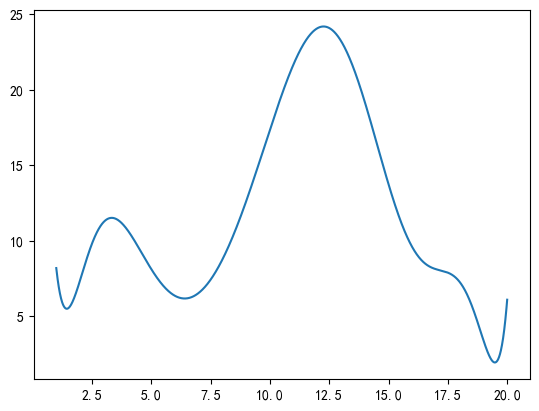

In [87]:
xp = np.linspace(1,20,2000)
yp = [p(i) for i in xp]
plt.plot(xp,yp)

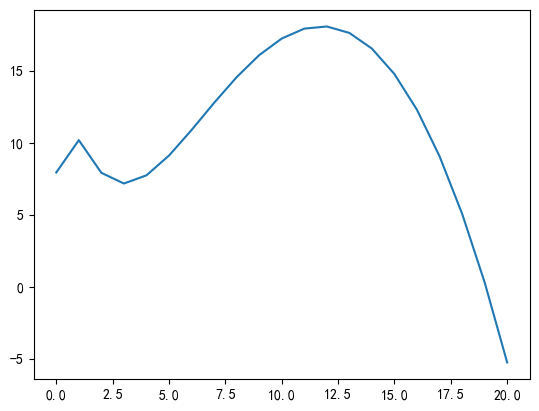